In [2]:
import yfinance as yf

import pandas as pd

In [4]:

# Define the ticker symbol for Bitcoin
bitcoin_ticker = "BTC-USD"

# Create a Yahoo Finance object for Bitcoin
bitcoin = yf.Ticker(bitcoin_ticker)

# Fetch historical daily data for Bitcoin
historical_data = bitcoin.history(period="1y")

In [5]:
historical_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-01 00:00:00+00:00,16547.914062,16630.439453,16521.234375,16625.080078,9244361700,0.0,0.0
2023-01-02 00:00:00+00:00,16625.509766,16759.343750,16572.228516,16688.470703,12097775227,0.0,0.0
2023-01-03 00:00:00+00:00,16688.847656,16760.447266,16622.371094,16679.857422,13903079207,0.0,0.0
2023-01-04 00:00:00+00:00,16680.205078,16964.585938,16667.763672,16863.238281,18421743322,0.0,0.0
2023-01-05 00:00:00+00:00,16863.472656,16884.021484,16790.283203,16836.736328,13692758566,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-28 00:00:00+00:00,43468.199219,43804.781250,42318.550781,42627.855469,22992093014,0.0,0.0
2023-12-29 00:00:00+00:00,42614.644531,43124.324219,41424.062500,42099.402344,26000021055,0.0,0.0
2023-12-30 00:00:00+00:00,42091.753906,42584.125000,41556.226562,42156.902344,16013925945,0.0,0.0


In [6]:


# Step 1: Collect Bitcoin 1-year price data
symbol = 'BTC-USD'
start_date = '2022-01-01'
end_date = '2022-12-31'

bitcoin_data = yf.download(symbol, start=start_date, end=end_date)

# Step 2: Calculate the maximum high price within a 3-day window
bitcoin_data['Max_3day_High'] = bitcoin_data['High'].rolling(window=3, min_periods=1).max()

max_high_price = bitcoin_data.loc[bitcoin_data['Max_3day_High'].idxmax()]['Max_3day_High']
max_high_date = bitcoin_data.loc[bitcoin_data['Max_3day_High'].idxmax()].name

# print(f"Maximum High Price within 3 days: {max_high_price} on {max_high_date}")

# Step 3: Calculate the minimum low price within a 3-day window
bitcoin_data['Min_3day_Low'] = bitcoin_data['Low'].rolling(window=3, min_periods=1).min()

min_low_price = bitcoin_data.loc[bitcoin_data['Min_3day_Low'].idxmin()]['Min_3day_Low']
min_low_date = bitcoin_data.loc[bitcoin_data['Min_3day_Low'].idxmin()].name

# print(f"Minimum Low Price within 3 days: {min_low_price} on {min_low_date}")

[*********************100%%**********************]  1 of 1 completed


In [7]:
bitcoin_data

,Open,High,Low,Close,Adj Close,Volume,Max_3day_High,Min_3day_Low
Date,,,,,,,,
2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500,47686.812500,24582667004,47827.312500,46288.484375
2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,47345.218750,27951569547,47881.406250,46288.484375
2022-01-03,47343.542969,47510.726562,45835.964844,46458.117188,46458.117188,33071628362,47881.406250,45835.964844
2022-01-04,46458.851562,47406.546875,45752.464844,45897.574219,45897.574219,42494677905,47881.406250,45752.464844
2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,43569.003906,36851084859,47510.726562,42798.222656
...,...,...,...,...,...,...,...,...
2022-12-26,16842.250000,16920.123047,16812.369141,16919.804688,16919.804688,11886957804,16920.123047,16755.253906
2022-12-27,16919.291016,16959.845703,16642.072266,16717.173828,16717.173828,15748580239,16959.845703,16642.072266
2022-12-28,16716.400391,16768.169922,16497.556641,16552.572266,16552.572266,17005713920,16959.845703,16497.556641


获取属于极值点的部分

In [10]:
import yfinance as yf
import pandas as pd

# Step 1: Collect Bitcoin 1-year price data
symbol = 'BTC-USD'
start_date = '2022-01-01'
end_date = '2022-12-31'

bitcoin_data = yf.download(symbol, start=start_date, end=end_date)

# Identify peaks (high points) and troughs (low points)
bitcoin_data['Is_Peak'] = (bitcoin_data['High'] > bitcoin_data['High'].shift(1)) & (bitcoin_data['High'] > bitcoin_data['High'].shift(-1))
bitcoin_data['Is_Trough'] = (bitcoin_data['Low'] < bitcoin_data['Low'].shift(1)) & (bitcoin_data['Low'] < bitcoin_data['Low'].shift(-1))

# Filter out only the extreme points
extreme_points = bitcoin_data[bitcoin_data['Is_Peak'] | bitcoin_data['Is_Trough']]

# Display the extreme points
extreme_points


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Is_Peak,Is_Trough
Date,,,,,,,,
2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,47345.218750,27951569547,True,False
2022-01-08,41561.464844,42228.941406,40672.277344,41733.941406,41733.941406,28066355845,False,True
2022-01-09,41734.726562,42663.949219,41338.160156,41911.601562,41911.601562,21294384372,True,False
2022-01-10,41910.230469,42199.484375,39796.570312,41821.261719,41821.261719,32104232331,False,True
2022-01-13,43946.742188,44278.421875,42447.042969,42591.570312,42591.570312,47691135082,True,False
...,...,...,...,...,...,...,...,...
2022-12-22,16818.380859,16866.673828,16592.408203,16830.341797,16830.341797,16441573050,False,True
2022-12-23,16829.644531,16905.218750,16794.458984,16796.953125,16796.953125,15329265213,True,False
2022-12-25,16847.505859,16860.554688,16755.253906,16841.986328,16841.986328,11656379938,False,True


In [18]:
extreme_points

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Is_Peak,Is_Trough,Is_Max_Peak,Is_Min_Trough
Date,,,,,,,,,,
2021-12-03,56509.164062,57482.167969,52496.585938,53598.246094,53598.246094,39789134215,True,False,True,False
2021-12-04,53727.878906,53904.679688,42874.617188,49200.703125,49200.703125,61385677469,False,True,False,True
2021-12-06,49413.480469,50929.519531,47281.035156,50582.625000,50582.625000,37707308001,False,True,False,True
2021-12-07,50581.828125,51934.781250,50175.808594,50700.085938,50700.085938,33676814852,True,False,True,False
2021-12-11,47264.632812,49458.210938,46942.347656,49362.507812,49362.507812,25775869261,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...
2022-12-22,16818.380859,16866.673828,16592.408203,16830.341797,16830.341797,16441573050,False,True,False,True
2022-12-23,16829.644531,16905.218750,16794.458984,16796.953125,16796.953125,15329265213,True,False,True,False
2022-12-25,16847.505859,16860.554688,16755.253906,16841.986328,16841.986328,11656379938,False,True,False,True


In [19]:
bitcoin_data

,Open,High,Low,Close,Adj Close,Volume,Is_Peak,Is_Trough,Is_Max_Peak,Is_Min_Trough
Date,,,,,,,,,,
2021-12-01,56907.964844,59041.683594,56553.082031,57229.828125,57229.828125,36858195307,False,False,False,False
2021-12-02,57217.371094,57349.234375,55895.132812,56477.816406,56477.816406,32379968686,False,False,False,False
2021-12-03,56509.164062,57482.167969,52496.585938,53598.246094,53598.246094,39789134215,True,False,True,False
2021-12-04,53727.878906,53904.679688,42874.617188,49200.703125,49200.703125,61385677469,False,True,False,True
2021-12-05,49201.519531,49768.148438,47857.496094,49368.847656,49368.847656,37198201161,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
2022-12-26,16842.250000,16920.123047,16812.369141,16919.804688,16919.804688,11886957804,False,False,False,False
2022-12-27,16919.291016,16959.845703,16642.072266,16717.173828,16717.173828,15748580239,True,False,True,False
2022-12-28,16716.400391,16768.169922,16497.556641,16552.572266,16552.572266,17005713920,False,True,False,True


In [38]:
import yfinance as yf
import pandas as pd

# Step 1: Collect Bitcoin 1-year price data
symbol = 'BTC-USD'
start_date = '2021-12-01'
end_date = '2022-12-31'

bitcoin_data = yf.download(symbol, start=start_date, end=end_date)

# Identify peaks (high points) and troughs (low points)
bitcoin_data['Is_Peak'] = (bitcoin_data['High'] > bitcoin_data['High'].shift(1)) & (bitcoin_data['High'] > bitcoin_data['High'].shift(-1))
bitcoin_data['Is_Trough'] = (bitcoin_data['Low'] < bitcoin_data['Low'].shift(1)) & (bitcoin_data['Low'] < bitcoin_data['Low'].shift(-1))

# Add an additional condition for peaks to ensure they are the highest within a 3-day window
bitcoin_data['Is_Max_Peak'] = bitcoin_data['Is_Peak'] & (bitcoin_data['High'] == bitcoin_data['High'].rolling(window=5, center=True).max())

# Add an additional condition for troughs to ensure they are the lowest within a 3-day window
bitcoin_data['Is_Min_Trough'] = bitcoin_data['Is_Trough'] & (bitcoin_data['Low'] == bitcoin_data['Low'].rolling(window=5, center=True).min())

# Filter out only the extreme points that satisfy the additional conditions
extreme_points = bitcoin_data[(bitcoin_data['Is_Max_Peak'] | bitcoin_data['Is_Min_Trough'])]

# Display the extreme points
extreme_points


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Is_Peak,Is_Trough,Is_Max_Peak,Is_Min_Trough
Date,,,,,,,,,,
2021-12-04,53727.878906,53904.679688,42874.617188,49200.703125,49200.703125,61385677469,False,True,False,True
2021-12-07,50581.828125,51934.781250,50175.808594,50700.085938,50700.085938,33676814852,True,False,True,False
2021-12-12,49354.855469,50724.867188,48725.851562,50098.335938,50098.335938,21939223599,True,False,True,False
2021-12-13,50114.742188,50205.000000,45894.847656,46737.480469,46737.480469,32166727776,False,True,False,True
2021-12-20,46707.062500,47401.718750,45579.808594,46880.277344,46880.277344,30961902129,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...
2022-12-14,17782.066406,18318.531250,17739.513672,17815.650391,17815.650391,25534481470,True,False,True,False
2022-12-16,17364.546875,17505.525391,16584.701172,16647.484375,16647.484375,24031608960,False,True,False,True
2022-12-19,16759.041016,16807.527344,16398.136719,16439.679688,16439.679688,17221074814,False,True,False,True


In [35]:
extreme_points['Date','Is_Max_Peak','Is_Min_Trough']

KeyError: ('Date', 'Is_Max_Peak', 'Is_Min_Trough')

'Date,Open,High,Low,Close,Adj Close,Volume,Is_Peak,Is_Trough,Is_Max_Peak,Is_Min_Trough\n2021-12-04,53727.87890625,53904.6796875,42874.6171875,49200.703125,49200.703125,61385677469,False,True,False,True\n2021-12-13,50114.7421875,50205.0,45894.84765625,46737.48046875,46737.48046875,32166727776,False,True,False,True\n2021-12-20,46707.0625,47401.71875,45579.80859375,46880.27734375,46880.27734375,30961902129,False,True,False,True\n2021-12-27,50802.609375,51956.328125,50499.46875,50640.41796875,50640.41796875,24324345758,True,False,True,False\n2021-12-31,47169.37109375,48472.52734375,45819.953125,46306.4453125,46306.4453125,36974172400,True,True,False,True\n2022-01-10,41910.23046875,42199.484375,39796.5703125,41821.26171875,41821.26171875,32104232331,False,True,False,True\n2022-01-13,43946.7421875,44278.421875,42447.04296875,42591.5703125,42591.5703125,47691135082,True,False,True,False\n2022-01-20,41744.02734375,43413.0234375,40672.82421875,40680.41796875,40680.41796875,20382033940,True,Fals

In [37]:
bitcoin_data


,Open,High,Low,Close,Adj Close,Volume,Is_Peak,Is_Trough,Is_Max_Peak,Is_Min_Trough
Date,,,,,,,,,,
2021-12-01,56907.964844,59041.683594,56553.082031,57229.828125,57229.828125,36858195307,False,False,False,False
2021-12-02,57217.371094,57349.234375,55895.132812,56477.816406,56477.816406,32379968686,False,False,False,False
2021-12-03,56509.164062,57482.167969,52496.585938,53598.246094,53598.246094,39789134215,True,False,False,False
2021-12-04,53727.878906,53904.679688,42874.617188,49200.703125,49200.703125,61385677469,False,True,False,True
2021-12-05,49201.519531,49768.148438,47857.496094,49368.847656,49368.847656,37198201161,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
2022-12-26,16842.250000,16920.123047,16812.369141,16919.804688,16919.804688,11886957804,False,False,False,False
2022-12-27,16919.291016,16959.845703,16642.072266,16717.173828,16717.173828,15748580239,True,False,True,False
2022-12-28,16716.400391,16768.169922,16497.556641,16552.572266,16552.572266,17005713920,False,True,False,False


In [31]:
bitcoin_data

,Open,High,Low,Close,Adj Close,Volume,Is_Peak,Is_Trough,Is_Max_Peak,Is_Min_Trough,Max_Price
Date,,,,,,,,,,,
2021-12-01,56907.964844,59041.683594,56553.082031,57229.828125,57229.828125,36858195307,False,False,False,False,NaN
2021-12-02,57217.371094,57349.234375,55895.132812,56477.816406,56477.816406,32379968686,False,False,False,False,NaN
2021-12-03,56509.164062,57482.167969,52496.585938,53598.246094,53598.246094,39789134215,True,False,True,False,NaN
2021-12-04,53727.878906,53904.679688,42874.617188,49200.703125,49200.703125,61385677469,False,True,False,True,59041.683594
2021-12-05,49201.519531,49768.148438,47857.496094,49368.847656,49368.847656,37198201161,False,False,False,False,57482.167969
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,16842.250000,16920.123047,16812.369141,16919.804688,16919.804688,11886957804,False,False,False,False,16959.845703
2022-12-27,16919.291016,16959.845703,16642.072266,16717.173828,16717.173828,15748580239,True,False,True,False,16959.845703
2022-12-28,16716.400391,16768.169922,16497.556641,16552.572266,16552.572266,17005713920,False,True,False,True,NaN


In [39]:
extreme_points

,Open,High,Low,Close,Adj Close,Volume,Is_Peak,Is_Trough,Is_Max_Peak,Is_Min_Trough
Date,,,,,,,,,,
2021-12-04,53727.878906,53904.679688,42874.617188,49200.703125,49200.703125,61385677469,False,True,False,True
2021-12-07,50581.828125,51934.781250,50175.808594,50700.085938,50700.085938,33676814852,True,False,True,False
2021-12-12,49354.855469,50724.867188,48725.851562,50098.335938,50098.335938,21939223599,True,False,True,False
2021-12-13,50114.742188,50205.000000,45894.847656,46737.480469,46737.480469,32166727776,False,True,False,True
2021-12-20,46707.062500,47401.718750,45579.808594,46880.277344,46880.277344,30961902129,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...
2022-12-14,17782.066406,18318.531250,17739.513672,17815.650391,17815.650391,25534481470,True,False,True,False
2022-12-16,17364.546875,17505.525391,16584.701172,16647.484375,16647.484375,24031608960,False,True,False,True
2022-12-19,16759.041016,16807.527344,16398.136719,16439.679688,16439.679688,17221074814,False,True,False,True


将btc价格拟合为曲线

[*********************100%%**********************]  1 of 1 completed


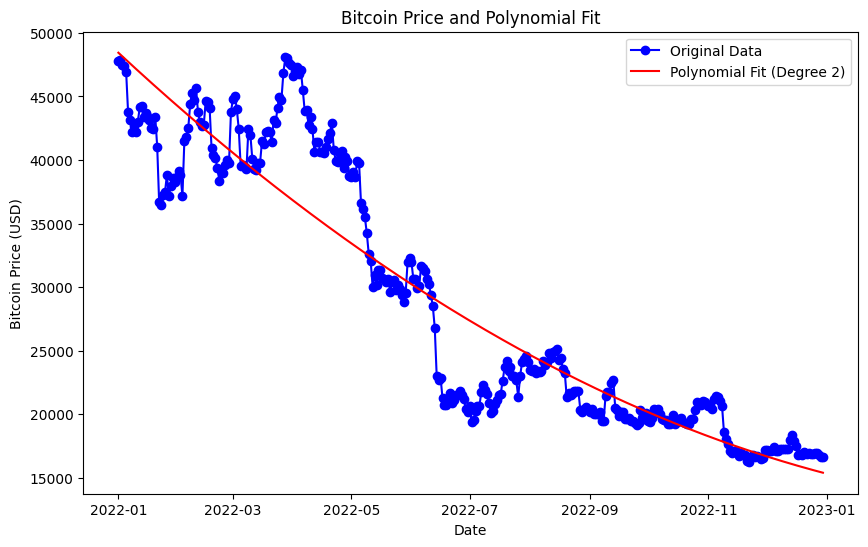

In [41]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Collect Bitcoin 1-year price data
symbol = 'BTC-USD'
start_date = '2022-01-01'
end_date = '2022-12-31'

bitcoin_data = yf.download(symbol, start=start_date, end=end_date)

# Extract the Date and High columns
dates = bitcoin_data.index
prices = bitcoin_data['High']

# Step 2: Fit the data to a polynomial curve
degree = 2  # Adjust the degree of the polynomial as needed
coefficients = np.polyfit(np.arange(len(dates)), prices, degree)
polynomial = np.poly1d(coefficients)

# Step 3: Plot the original data and the fitted curve
plt.figure(figsize=(10, 6))
plt.plot(dates, prices, label='Original Data', marker='o', linestyle='-', color='blue')
plt.plot(dates, polynomial(np.arange(len(dates))), label=f'Polynomial Fit (Degree {degree})', linestyle='-', color='red')
plt.title('Bitcoin Price and Polynomial Fit')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price (USD)')
plt.legend()
plt.show()


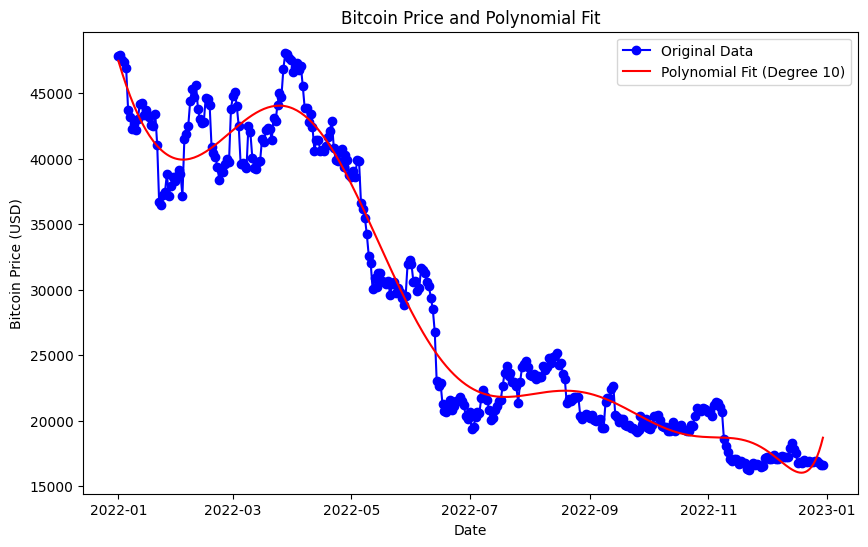

In [42]:
# Step 2: Fit the data to a polynomial curve
degree = 10  # Adjust the degree of the polynomial as needed
coefficients = np.polyfit(np.arange(len(dates)), prices, degree)
polynomial = np.poly1d(coefficients)

# Step 3: Plot the original data and the fitted curve
plt.figure(figsize=(10, 6))
plt.plot(dates, prices, label='Original Data', marker='o', linestyle='-', color='blue')
plt.plot(dates, polynomial(np.arange(len(dates))), label=f'Polynomial Fit (Degree {degree})', linestyle='-',
         color='red')
plt.title('Bitcoin Price and Polynomial Fit')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price (USD)')
plt.legend()
plt.show()




[*********************100%%**********************]  1 of 1 completed


/var/folders/7b/q0cghq5j6kgc7qm5xq0qzfsc0000gn/T/ipykernel_72783/124683123.py:21: RankWarning: Polyfit may be poorly conditioned
  high_coefficients = np.polyfit(np.arange(len(dates)), high_prices, degree)
/var/folders/7b/q0cghq5j6kgc7qm5xq0qzfsc0000gn/T/ipykernel_72783/124683123.py:25: RankWarning: Polyfit may be poorly conditioned
  low_coefficients = np.polyfit(np.arange(len(dates)), low_prices, degree)


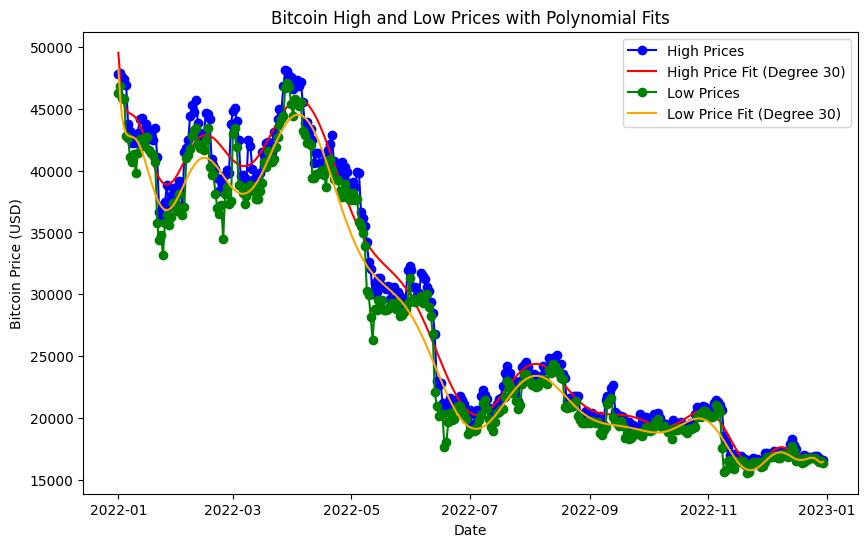

In [46]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Collect Bitcoin 1-year price data
symbol = 'BTC-USD'
start_date = '2022-01-01'
end_date = '2022-12-31'

bitcoin_data = yf.download(symbol, start=start_date, end=end_date)

# Extract the Date, High, and Low columns
dates = bitcoin_data.index
high_prices = bitcoin_data['High']
low_prices = bitcoin_data['Low']

# Step 2: Fit the data to polynomial curves for high and low prices
degree = 30  # Adjust the degree of the polynomial as needed

# Fit polynomial for high prices
high_coefficients = np.polyfit(np.arange(len(dates)), high_prices, degree)
high_polynomial = np.poly1d(high_coefficients)

# Fit polynomial for low prices
low_coefficients = np.polyfit(np.arange(len(dates)), low_prices, degree)
low_polynomial = np.poly1d(low_coefficients)

# Step 3: Plot the original data and the fitted curves
plt.figure(figsize=(10, 6))

# Plot high prices
plt.plot(dates, high_prices, label='High Prices', marker='o', linestyle='-', color='blue')
plt.plot(dates, high_polynomial(np.arange(len(dates))), label=f'High Price Fit (Degree {degree})', linestyle='-', color='red')

# Plot low prices
plt.plot(dates, low_prices, label='Low Prices', marker='o', linestyle='-', color='green')
plt.plot(dates, low_polynomial(np.arange(len(dates))), label=f'Low Price Fit (Degree {degree})', linestyle='-', color='orange')

plt.title('Bitcoin High and Low Prices with Polynomial Fits')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price (USD)')
plt.legend()
plt.show()


In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Collect Bitcoin 1-year price data
symbol = 'BTC-USD'
start_date = '2022-01-01'
end_date = '2022-12-31'

bitcoin_data = yf.Ticker(symbol).history(
    interval = "1wk",
    start=start_date,
    end=end_date)

bitcoin_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-01 00:00:00+00:00,46311.746094,47881.406250,41077.445312,41557.902344,279356283486,0.0,0.0
2022-01-08 00:00:00+00:00,41561.464844,44278.421875,39796.570312,43099.699219,212561098618,0.0,0.0
2022-01-15 00:00:00+00:00,43101.898438,43724.671875,35791.425781,36457.316406,166867128860,0.0,0.0
2022-01-22 00:00:00+00:00,36471.589844,38825.410156,33184.058594,37784.332031,212622064733,0.0,0.0
2022-01-29 00:00:00+00:00,37780.714844,41527.785156,36375.539062,41500.875000,140019897289,0.0,0.0
2022-02-05 00:00:00+00:00,41501.480469,45661.171875,41038.097656,42407.937500,179859059961,0.0,0.0
2022-02-12 00:00:00+00:00,42412.300781,44667.218750,39637.617188,40030.976562,145792639556,0.0,0.0
2022-02-19 00:00:00+00:00,40026.023438,40418.878906,34459.218750,39214.218750,181629162658,0.0,0.0
2022-02-26 00:00:00+00:00,39213.082031,45077.578125,37268.976562,39137.605469,191753910140,0.0,0.0


In [2]:
# Identify peaks (high points) and troughs (low points)
bitcoin_data['Is_Peak'] = (bitcoin_data['High'] > bitcoin_data['High'].shift(1)) & (bitcoin_data['High'] > bitcoin_data['High'].shift(-1))
bitcoin_data['Is_Trough'] = (bitcoin_data['Low'] < bitcoin_data['Low'].shift(1)) & (bitcoin_data['Low'] < bitcoin_data['Low'].shift(-1))

# Add an additional condition for peaks to ensure they are the highest within a 3-day window
bitcoin_data['Is_Max_Peak'] = bitcoin_data['Is_Peak'] & (bitcoin_data['High'] == bitcoin_data['High'].rolling(window=5, center=True).max())

# Add an additional condition for troughs to ensure they are the lowest within a 3-day window
bitcoin_data['Is_Min_Trough'] = bitcoin_data['Is_Trough'] & (bitcoin_data['Low'] == bitcoin_data['Low'].rolling(window=5, center=True).min())

# Filter out only the extreme points that satisfy the additional conditions
extreme_points = bitcoin_data[(bitcoin_data['Is_Max_Peak'] | bitcoin_data['Is_Min_Trough'])]

# Display the extreme points
extreme_points


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Is_Peak,Is_Trough,Is_Max_Peak,Is_Min_Trough
Date,,,,,,,,,,,
2022-01-22 00:00:00+00:00,36471.589844,38825.410156,33184.058594,37784.332031,212622064733,0.0,0.0,False,True,False,True
2022-02-05 00:00:00+00:00,41501.480469,45661.171875,41038.097656,42407.937500,179859059961,0.0,0.0,True,False,True,False
2022-02-19 00:00:00+00:00,40026.023438,40418.878906,34459.218750,39214.218750,181629162658,0.0,0.0,False,True,False,True
2022-02-26 00:00:00+00:00,39213.082031,45077.578125,37268.976562,39137.605469,191753910140,0.0,0.0,True,False,True,False
2022-03-26 00:00:00+00:00,44349.859375,48086.835938,44166.273438,46281.644531,213694535844,0.0,0.0,True,False,True,False
2022-05-07 00:00:00+00:00,36042.503906,36129.925781,26350.490234,29283.103516,364524625721,0.0,0.0,False,True,False,True
2022-05-28 00:00:00+00:00,28622.625000,32249.863281,28554.566406,29704.390625,222824594805,0.0,0.0,True,False,True,False
2022-06-18 00:00:00+00:00,20473.425781,21620.628906,17708.623047,21231.656250,216848726295,0.0,0.0,False,True,False,True
2022-08-13 00:00:00+00:00,24402.187500,25135.589844,20868.847656,20877.552734,204047513658,0.0,0.0,True,False,True,False
